In [29]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

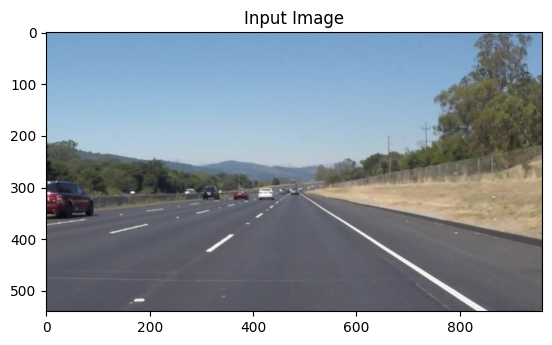

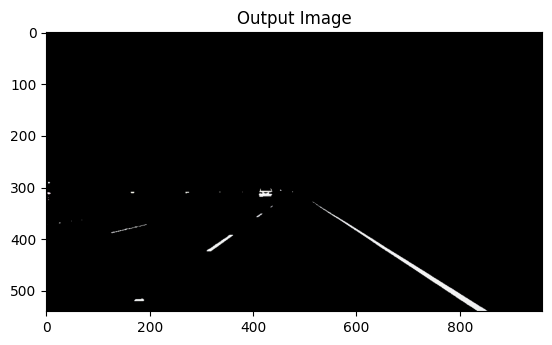

In [30]:
#Read in the image.
img = mpimg.imread('test_images/solidWhiteRight.jpg')

#Grab the x and y size and make a copy of the image.
ysize = img.shape[0]
xsize = img.shape[1]
color_select = np.copy(img)
 
# Define color selection criteria
rgb_threshold = [200,200,200]

threshold = (img[:,:,0] < rgb_threshold[0])\
          | (img[:,:,1] < rgb_threshold[1])\
          | (img[:,:,2] < rgb_threshold[2])
color_select[threshold] = [0,0,0]

#Display the image.

plt.imshow(img)
plt.title('Input Image')
plt.show()
plt.imshow(color_select)
plt.title('Output Image')
plt.show()


In the above output we can clearly see the lane lines

# Region Masking

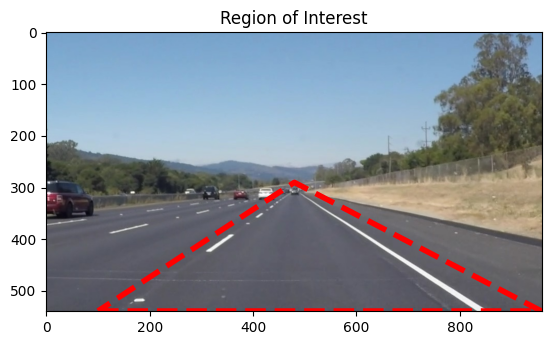

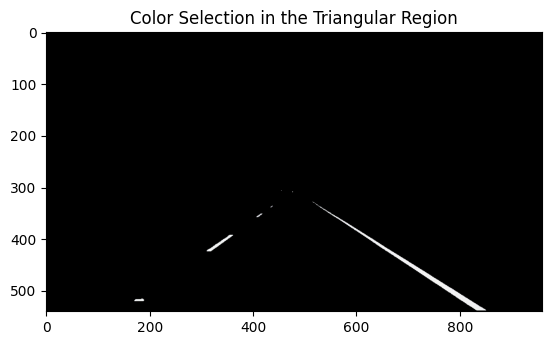

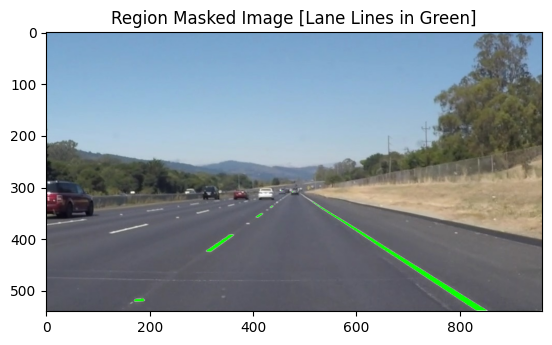

In [31]:
# Read in the image
img = mpimg.imread('test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = img.shape[0]
xsize = img.shape[1]
color_select = np.copy(img)
line_image = np.copy(img)

# Define color selection criteria
rgb_threshold = [200,200,200]
left_bottom = [100,539]
right_bottom = [958,539]
apex = [480,290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit

fit_left = np.polyfit((left_bottom[0],apex[0]), (left_bottom[1],apex[1]), 1)
fit_right = np.polyfit((right_bottom[0],apex[0]), (right_bottom[1],apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]), (left_bottom[1],right_bottom[1]), 1)

# Mask pixels below the threshold
color_threshold = (img[:,:,0] < rgb_threshold[0])\
                | (img[:,:,1] < rgb_threshold[1])\
                | (img[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0,xsize), np.arange(0,ysize))
region_threshold = (YY > (XX*fit_left[0]) + fit_left[1]) & \
                   (YY > (XX*fit_right[0]) + fit_right[1]) & \
                   (YY < (XX*fit_bottom[0]) + fit_bottom[1])

# Mask color and region selection
color_select[color_threshold | ~region_threshold] = [0,0,0]
line_image[~color_threshold & region_threshold] = [9,255,0]

# Display the image and show region and color selections
plt.imshow(img)

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

plt.plot(x, y, 'r--', lw = 4)

plt.title('Region of Interest')
plt.show()
plt.imshow(color_select)

plt.title('Color Selection in the Triangular Region')
plt.show()
plt.imshow(line_image)

plt.title('Region Masked Image [Lane Lines in Green]')
plt.show()

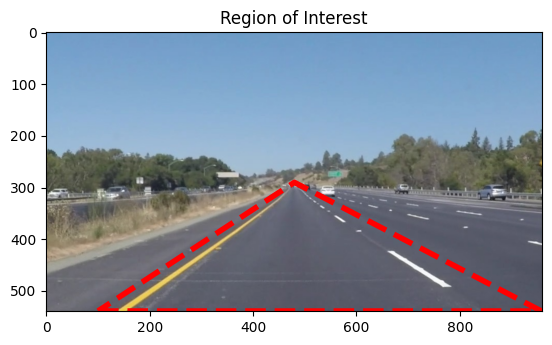

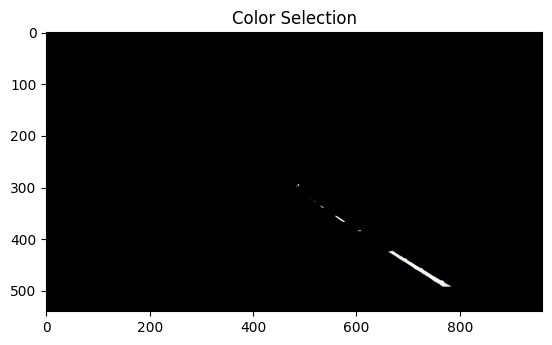

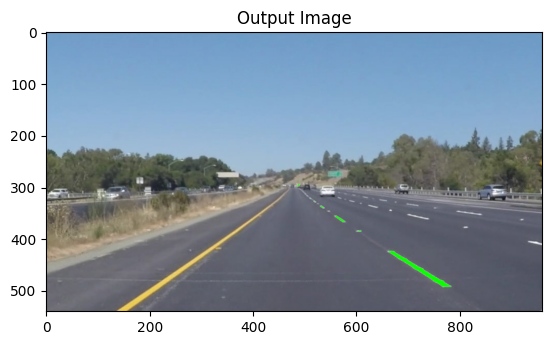

In [32]:
# Read in the image
img = mpimg.imread('test_images/solidYellowLeft.jpg')

# Grab the x and y size and make a copy of the image
ysize = img.shape[0]
xsize = img.shape[1]
color_select = np.copy(img)
line_image = np.copy(img)

# Define color selection criteria
rgb_threshold = [200,200,200]
left_bottom = [100,539]
right_bottom = [958,539]
apex = [480,290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit

fit_left = np.polyfit((left_bottom[0],apex[0]), (left_bottom[1],apex[1]), 1)
fit_right = np.polyfit((right_bottom[0],apex[0]), (right_bottom[1],apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]), (left_bottom[1],right_bottom[1]), 1)

# Mask pixels below the threshold
color_threshold = (img[:,:,0] < rgb_threshold[0])\
                | (img[:,:,1] < rgb_threshold[1])\
                | (img[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0,xsize), np.arange(0,ysize))
region_threshold = (YY > (XX*fit_left[0]) + fit_left[1]) & \
                   (YY > (XX*fit_right[0]) + fit_right[1]) & \
                   (YY < (XX*fit_bottom[0]) + fit_bottom[1])

# Mask color and region selection
color_select[color_threshold | ~region_threshold] = [0,0,0]
line_image[~color_threshold & region_threshold] = [9,255,0]

# Display the image and show region and color selections
plt.imshow(img)

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

plt.plot(x, y, 'r--', lw = 4)

plt.title('Region of Interest')
plt.show()
plt.imshow(color_select)

plt.title('Color Selection')
plt.show()
plt.imshow(line_image)

plt.title('Output Image')
plt.show()

# Canny Edge Detection

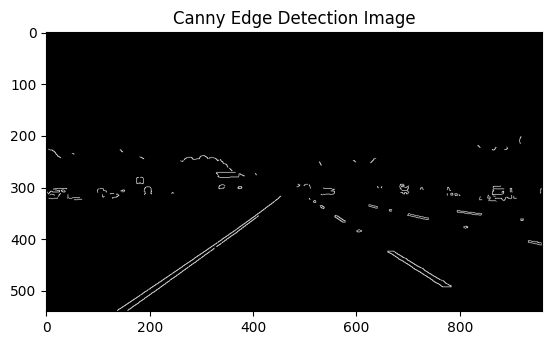

In [33]:
# Read in the image and convert to grayscale
img = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap = 'Greys_r')
plt.title('Canny Edge Detection Image')
plt.show()

# Hough Transform and detecting Lane Lines

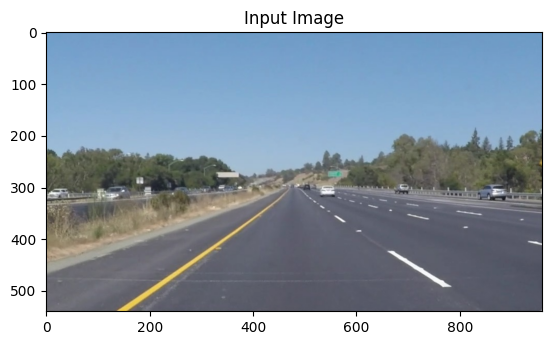

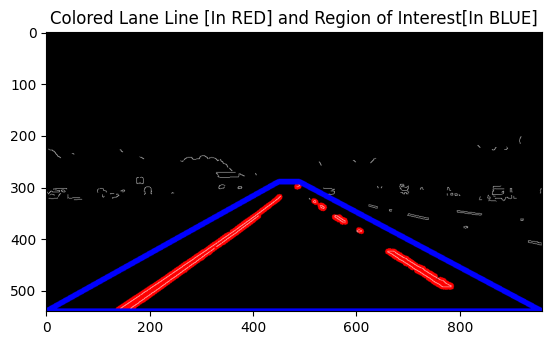

In [34]:
# Read in the image and convert to grayscale
img = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

mask = np.zeros_like(edges)
ignore_mask_color = 255

imshape = img.shape
vertices = np.array([[(0,imshape[0]), (450,290), (490, 290), 
                      (imshape[1], imshape[0])]], dtype = np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 2

min_line_length = 4
max_line_gap = 5

line_image = np.copy(img)*0

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([])
                       , min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

        
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

# Draw the lines on the edge image
line_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
line_edges = cv2.polylines(line_edges, vertices, True, (0,0,255), 10)

plt.imshow(img)
plt.title('Input Image')
plt.show()

plt.imshow(line_edges)
plt.title('Colored Lane Line [In RED] and Region of Interest[In BLUE]')
plt.show()

# Make a Lane Detection Pipeline

1. Gray Scale
2. Gaussian Smoothing
3. Canny Edge Detection
4. Region Masking
5. Hough Transform
6. Draw Lines [Mark Lane Lines with different Color]

In [47]:
import math

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def canny(image,low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

def gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def region_of_interest(image, vertices):
    mask = np.zeros_like(image)
    if len(image.shape) > 2:
        channel_count = image.shape[2]
        ignore_mask_color = (255,)*channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def draw_lines(image, lines, color=[255,0,0], thickness=10):
   
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)

            
def slope_lines(img, lines):
    image = img.copy()
    poly_vertices = []
    order = [0,1,3,2]
    
    left_lines = []
    right_lines = []
    for line in lines:
        for x1,y1,x2,y2 in line:
            
            if x1 == x2:
                pass
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1
                
                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))
                    
    left_line  = np.mean(left_lines, axis = 0)            
    right_line = np.mean(right_lines, axis = 0)
    
    for slope, intercept in [left_line, right_line]:
        rows, cols = img.shape[:2]
        y1 = int(rows)
        y2 = int(rows*0.6)
        x1 = int((y1-intercept)/slope)
        x2 = int((y2-intercept)/slope)
        
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        
        draw_lines(image, np.array([[[x1,y1,x2,y2]]]))
        
        poly_vertices = [poly_vertices[i] for i in order if 0 <= i < len(poly_vertices)]
        cv2.fillPoly(image, pts = np.array([poly_vertices], 'int32'), color = (0,255,0))
        return cv2.addWeighted(img, 0.7, image, 0.4, 0.)
    
def hough_lines(image, rho, theta, threshold, min_line_len,
                max_line_gap):
    lines = cv2.HoughLinesP(image, rho, theta, threshold, 
                np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)
    line_img = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    line_img = slope_lines(line_img, lines)
    return line_img

def weighted_img(image, initial_img, α=0.1, β=1., γ=0.):
    lines_edges = cv2.addWeighted(initial_img,α, image, β, γ)
    #lines_edges = cv2.polylines(lines_edges,get_vertices(image), True, (0,0,255), 10)
    return lines_edges

def get_vertices(img):
    rows,cols = img.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6]
    
    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [48]:
# Lane finding pipeline
def lane_finding_pipeline(img):
    #GrayScale
    gray_img = grayscale(img)
    #Gaussian Smoothing
    smoothed_img  = gaussian_blur(image = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img     = canny(image = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img    = region_of_interest(image = canny_img, vertices = get_vertices(img))
    #Hough Transform Lines
    houghed_lines = hough_lines(image = masked_img, rho = 1, theta = np.pi/180, threshold = 20,
                               min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output        = weighted_img(image = houghed_lines, initial_img = img, α=0.8, β=1., γ=0.)
    
    return output

# Testing Algorithm Pipeline with Different Images

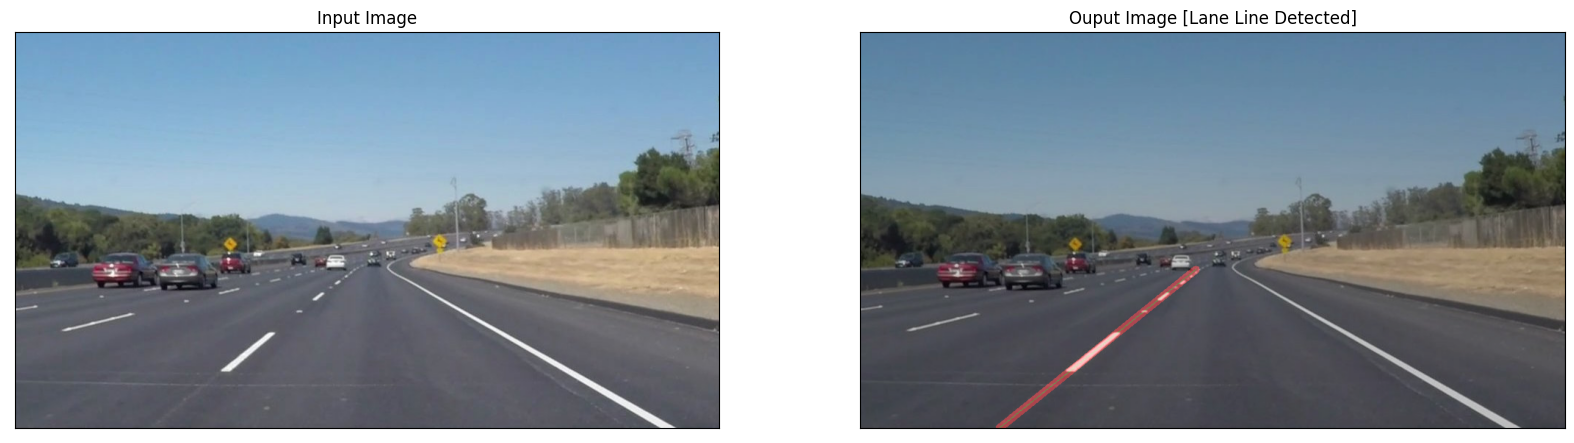

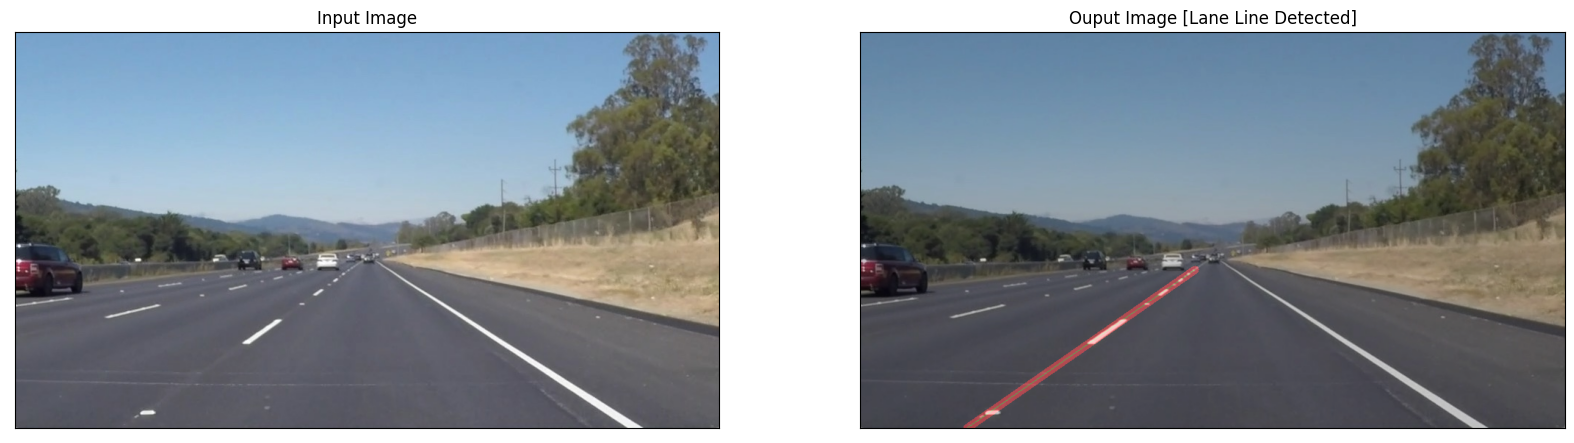

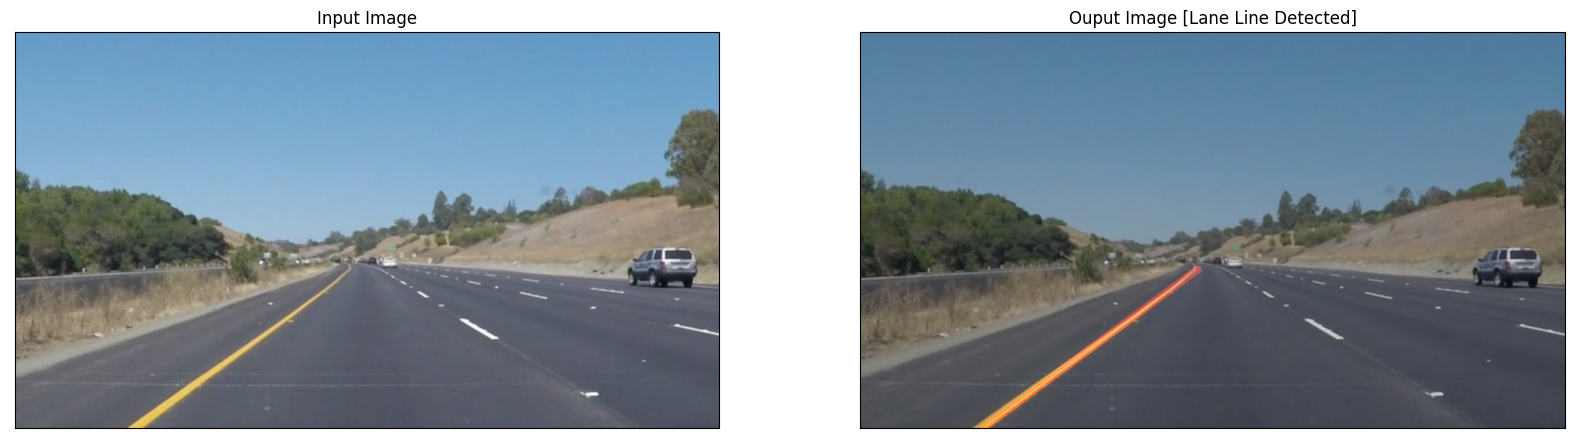

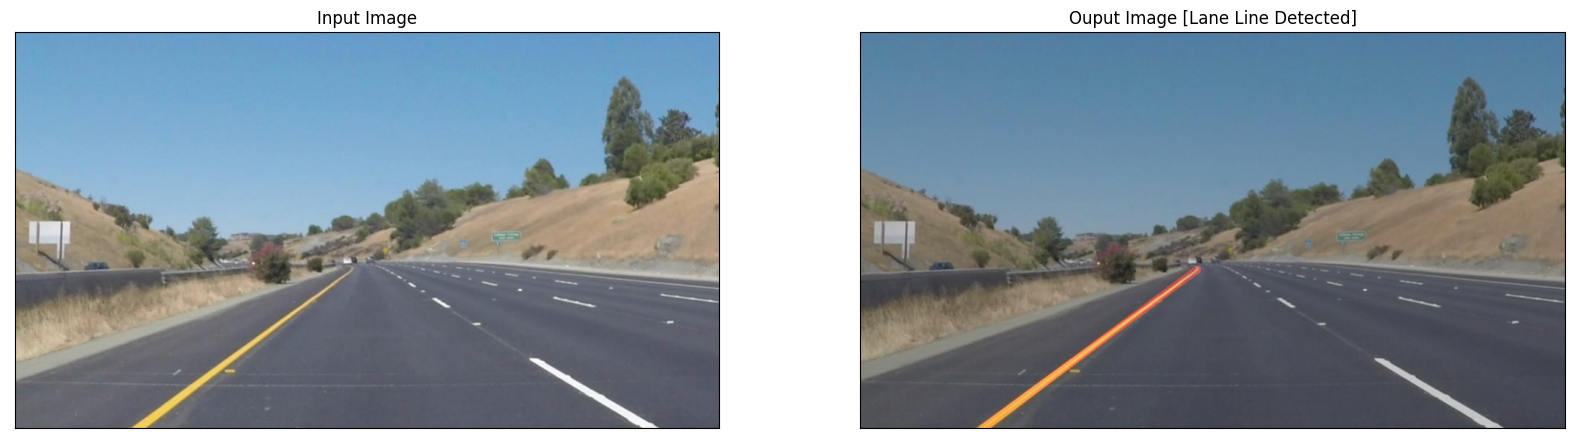

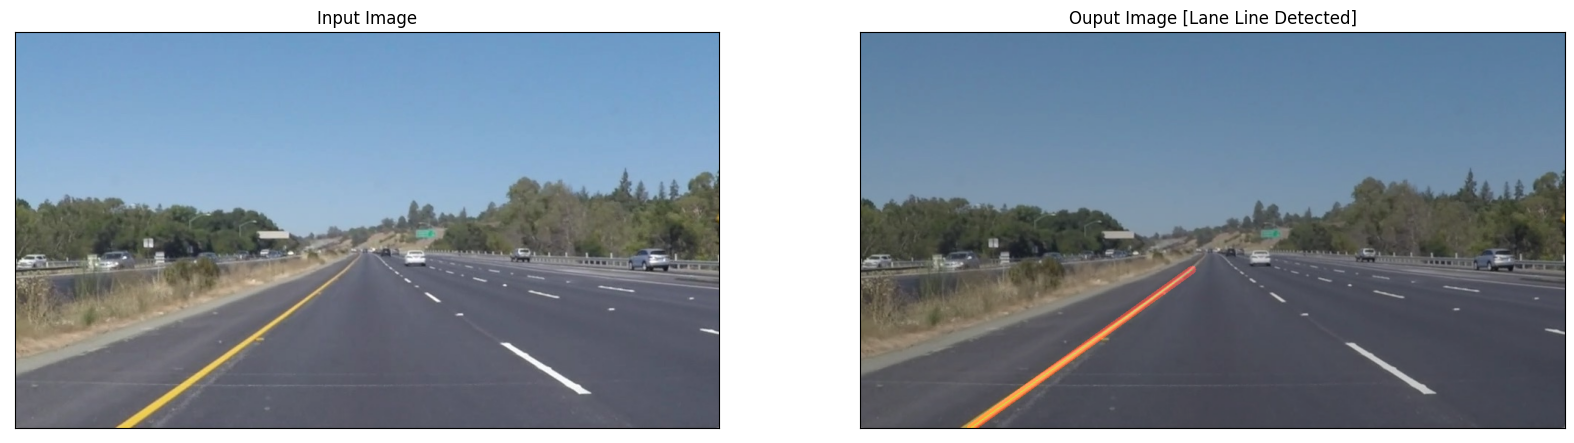

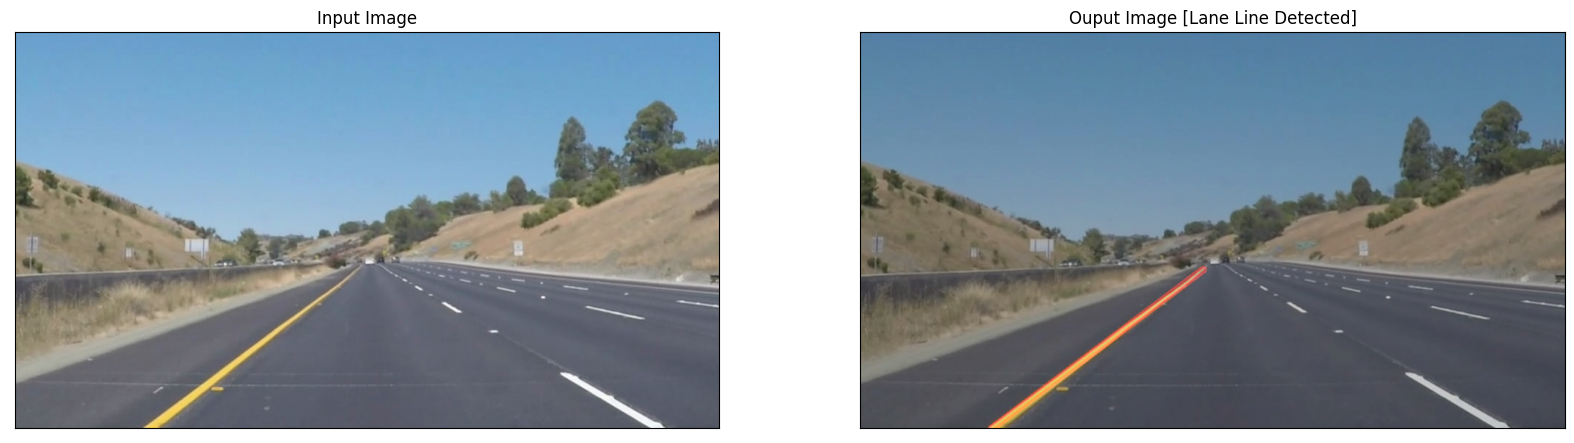

In [49]:
for image_path in list(os.listdir('./test_images/')):
    fig = plt.figure(figsize=(20,10))
    img = mpimg.imread(f'./test_images/{image_path}')
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.imshow(img)
    ax.set_title('Input Image')
    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(lane_finding_pipeline(img))
    ax.set_title('Ouput Image [Lane Line Detected]')
    plt.show()

# Real-time Lane Line Detection

In [38]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Test with Video Clip 1 [Solid White Lane Lines]

In [39]:
white_output = './solidWhiteRight.mp4'
clip1 = VideoFileClip('./test_videos/solidWhiteRight.mp4')
white_clip = clip1.fl_image(lane_finding_pipeline) 
%time white_clip.write_videofile(white_output, audio=False)


Moviepy - Building video ./solidWhiteRight.mp4.
Moviepy - Writing video ./solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready ./solidWhiteRight.mp4
CPU times: total: 6.03 s
Wall time: 4.93 s


In [25]:
HTML("""
<video width="760" height="400" controls>
  <source src="{0}">
</video>
""".format(white_output))

Test with Video Clip 2 [With Yellow Lane Lines]

In [26]:
yellow_output = './solidYellowLeft.mp4'
clip2 = VideoFileClip('./test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(lane_finding_pipeline)
%time yellow_clip.write_videofile(yellow_output, audio=False)

Moviepy - Building video ./solidYellowLeft.mp4.
Moviepy - Writing video ./solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready ./solidYellowLeft.mp4
CPU times: total: 20 s
Wall time: 14.8 s


In [28]:
HTML("""
<video width="760" height="400" controls>
  <source src="{0}">
</video>
""".format(yellow_output))